In [13]:
import pandas as pd
import numpy as np
from collections import Counter
import math
from sklearn.metrics import accuracy_score

In [14]:
import matplotlib.pyplot as plt

In [15]:
train_df = pd.read_csv("C:\\Rushiil\\ML\\concrete\\train.csv")
X_train = train_df.drop('output', axis=1)
y_train = train_df['output']

test_df = pd.read_csv("C:\\Rushiil\\ML\\concrete\\test.csv")
X_test = test_df.drop('output', axis=1)
y_test = test_df['output']

Learned weight vector: [-0.00597701 -0.19335186 -0.15345705  0.3670641  -0.02694859  0.11399397
 -0.02926941]
Learning rate: 7.2479248046875e-06
Cost on test data: 0.43656316863705463


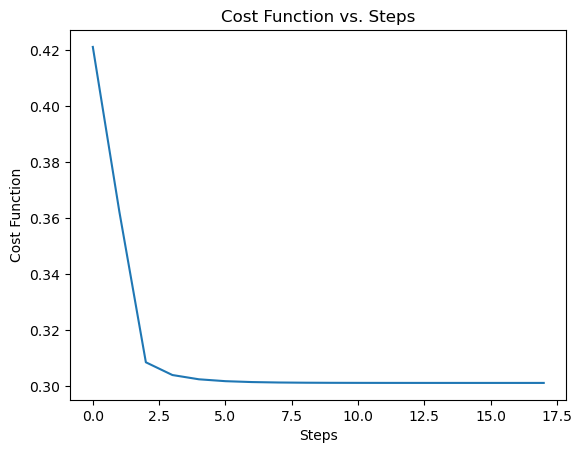

In [16]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

# Initialize variables
num_features = X_train.shape[1]  # Number of features
w = np.zeros(num_features)  # Initialize weights to zeros
learning_rate = 0.95  # Initial learning rate
tolerance = 1e-6  # Tolerance for convergence
cost_values = []  # List to store cost values

# Define the cost function (Mean Squared Error)
def calculate_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement Batch Gradient Descent
def batch_gradient_descent(X, y, w, learning_rate):
    m = len(y)
    predictions = np.dot(X, w)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    w_new = w - learning_rate * gradient
    return w_new

# Batch Gradient Descent to find optimal weights
while True:
    # Calculate current cost
    current_cost = calculate_cost(X_train, y_train, w)
    cost_values.append(current_cost)
    
    # Update weights using batch gradient descent
    new_w = batch_gradient_descent(X_train, y_train, w, learning_rate)
    
    # Check for convergence based on the norm of weight vector difference
    if np.linalg.norm(new_w - w) < tolerance:
        w = new_w
        break
    
    # Update weights
    w = new_w
    learning_rate /= 2.0  # Reduce learning rate for next iteration

# Calculate cost on test data using the final weight vector
test_cost = calculate_cost(X_test, y_test, w)

# Print learned weight vector and learning rate
print("Learned weight vector:", w)
print("Learning rate:", learning_rate)
print("Cost on test data:", test_cost)

# Plot cost function vs. steps
plt.plot(cost_values)
plt.xlabel('Steps')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Steps')
plt.show()